<a href="https://colab.research.google.com/github/SachinScaler/Oct24HypothesisTesting/blob/main/ANOVA%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_aerofit = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/aerofit.csv')
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [2]:
df_aerofit['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [3]:
df_aerofit['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


Chi-Square

In [4]:
df_aerofit['Income'].value_counts()

,count
Income,
45480,14
52302,9
46617,8
54576,8
53439,8
...,...
65220,1
55713,1
68220,1


In [5]:
df_aerofit['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


<Axes: xlabel='Product', ylabel='Income'>

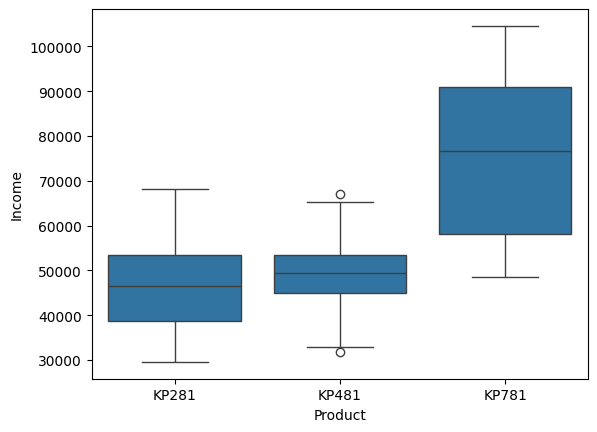

In [6]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [7]:
n_categories = 3
c = 2
# n C 2

In [8]:
### Create a random Category column as well
np.random.seed(42)
df_aerofit['random_group']= np.random.choice(["g1", "g2", "g3"],size=len(df_aerofit))

df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

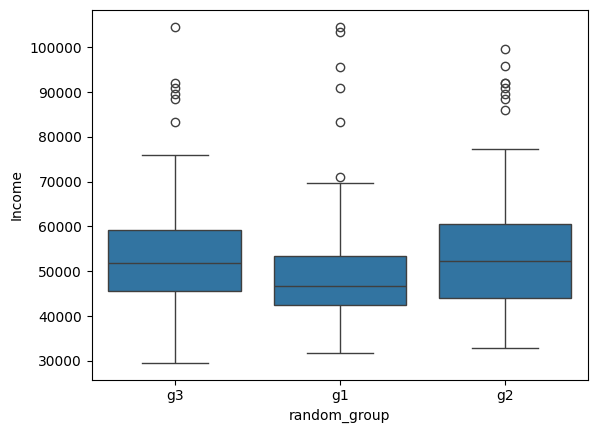

In [9]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

### Let's run ANOVA Test for each of the above

In [10]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [11]:
### Let's seperate values of three Groups
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]


In [12]:
income_g1.mean(), income_g2.mean(),income_g3.mean()

(51840.44827586207, 55812.69642857143, 53594.954545454544)

In [13]:
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

print("Test Statistic", f_stats)
print("P-Value", p_value)

Test Statistic 0.8263259710788367
P-Value 0.43933541801191467


In [14]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Fail to reject H0
All groups have same mean


### Let's repeat now for income vs product

In [15]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

income_kp281.mean(), income_kp481.mean(), income_kp781.mean()


(46418.025, 48973.65, 75441.575)

In [16]:
f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

print("Test Statistic", f_stats)
print("P-Value", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast one group have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Test Statistic 89.25903546601671
P-Value 1.5644991316342494e-27
Reject H0
Atleast one group have different mean


### Can you try pair wise test just for fun and find out which pair is actually different

In [17]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
t_stat, p_value

(-1.6817688139914835, 0.09487529747264932)

In [18]:
from scipy.stats import kruskal
stat, p_value = kruskal(income_g1, income_g2, income_g3)

print("Test Statistic", stat)
print("P-Value", p_value)


Test Statistic 2.720864198623469
P-Value 0.2565498979655774


In [19]:
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Fail to reject H0
All groups have same median


In [20]:
from scipy.stats import kruskal

stat, p_value = kruskal(income_kp281, income_kp481, income_kp781)

print("Test Statistic", stat)
print("P-Value", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Atleast one group have different median")
else:
    print("Fail to reject H0")
    print("All groups have same median")

Test Statistic 61.43670384567185
P-Value 4.562357014275808e-14
Reject H0
Atleast one group have different median


In [21]:
###
!wget --no-check-certificate https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb -O weight-height.csv


--2024-11-05 09:36:35--  https://drive.google.com/uc?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.102, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb [following]
--2024-11-05 09:36:35--  https://drive.usercontent.google.com/download?id=1BbOJnKXUEPWrhjjLlZS_2-HoGvtZeubb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.009s  

2024-11-05 09:36:38 (47.5 MB/

In [22]:
path = '/content/weight-height.csv'
df_hw = pd.read_csv(path)

df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

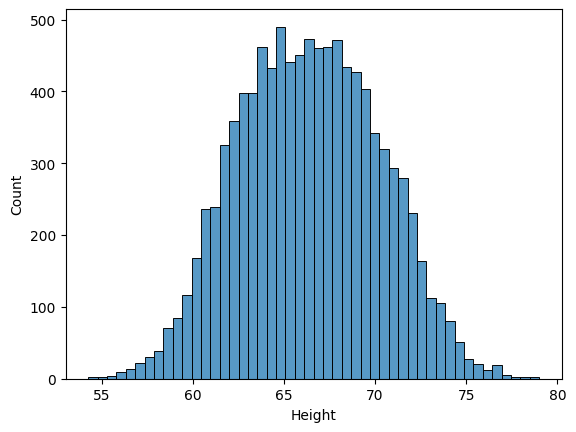

In [23]:
height = df_hw['Height']
weight = df_hw['Weight']
sns.histplot(height)

<Axes: xlabel='Weight', ylabel='Count'>

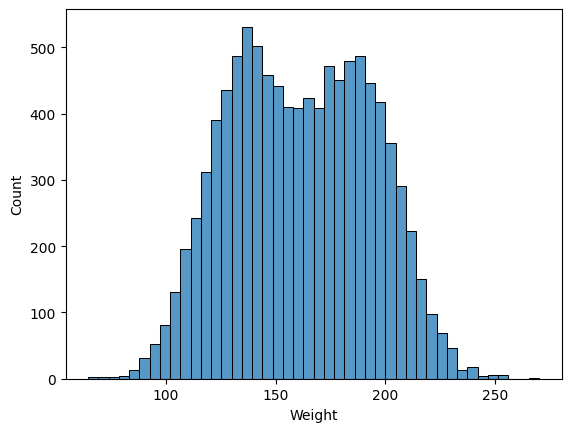

In [24]:
sns.histplot(weight)

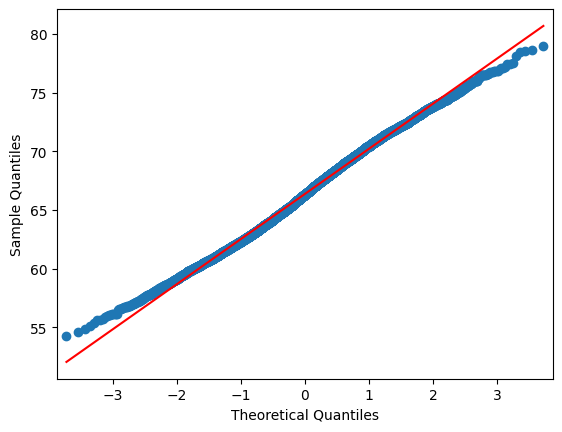

In [25]:
# import qqplot
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(height, line='s')
plt.show()

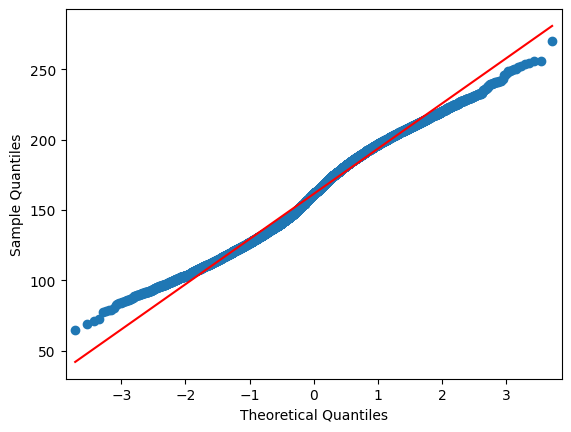

In [26]:
qqplot(weight, line='s')
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

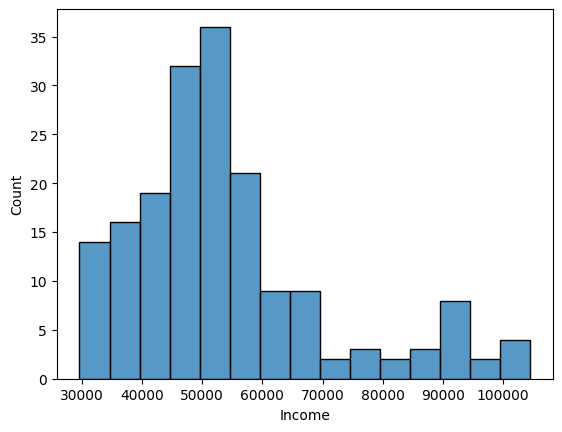

In [27]:
sns.histplot(df_aerofit['Income'])

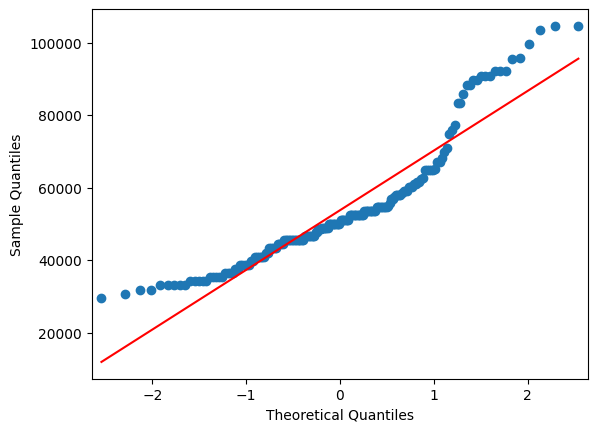

In [28]:
qqplot(df_aerofit['Income'], line='s')
plt.show()

In [29]:
!wget --no-check-certificate https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI -O waiting_time.csv

path = '/content/waiting_time.csv'
df_wt = pd.read_csv(path)

df_wt.head()

--2024-11-05 09:36:43--  https://drive.google.com/uc?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.102, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI [following]
--2024-11-05 09:36:44--  https://drive.usercontent.google.com/download?id=1v48RRtiivufSX4ewrMaxsADK73GnN2kI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1656272 (1.6M) [application/octet-stream]
Saving to: ‘waiting_time.csv’

waiting_time.csv    100%[===================>]   1.58M  --.-KB/s    in 0.04s   

2024-11-05 09:36:47 (35.7 MB/

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

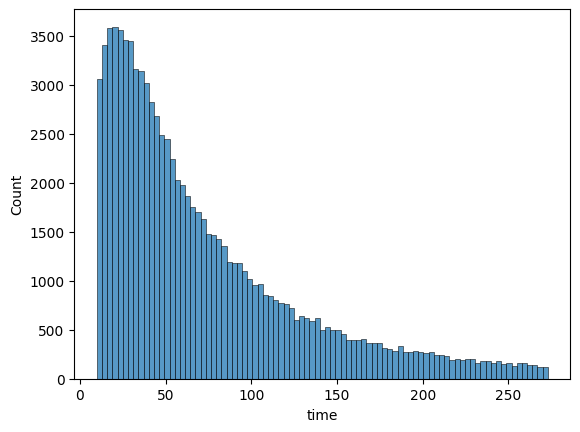

In [30]:
sns.histplot(df_wt['time'])

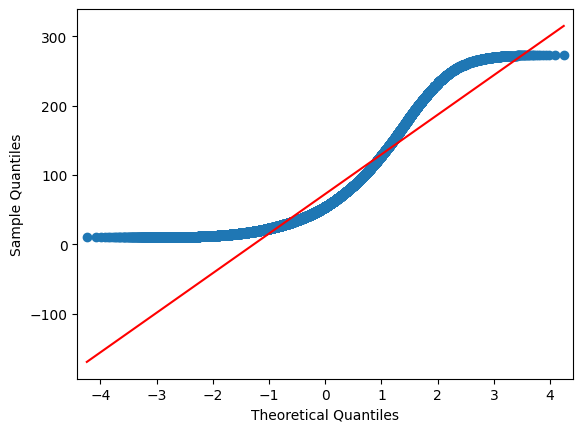

In [31]:
qqplot(df_wt['time'], line='s')
plt.show()

### Statistical Test:
### Shapiro-wilk:

In [32]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_wt['time'].sample(100))

print("Test Statistic", stat)
print("P-Value", p_value)

Test Statistic 0.8951688723064811
P-Value 8.438348379406255e-07


In [33]:
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Reject H0
Data is not Gaussian


In [34]:
from scipy.stats import shapiro

stat, p_value = shapiro(height.sample(100))

print("Test Statistic", stat)
print("P-Value", p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")

Test Statistic 0.982248726590592
P-Value 0.1982102529933813
Fail to reject H0
Data is Gaussian


###


### Levene Test
Another assumption of ANOVA is that: ***There should be equal variance in different groups/categories in our data**

Imagine you have multiple groups, and you want to see if the variability (spread) of data within each group is roughly the same.


How would we go about verifying that?

The Levene test comes to the rescue by calculating a p-value.

This p-value tells us whether the variances across the groups are statistically similar or if there are significant differences.

- If the p-value is high (greater than, say, 0.05), It implies that the variances are relatively equal across the groups.
This aligns well with the assumption of equal variance.
- On the other hand, if the p-value is low (less than 0.05), It suggests that the variances significantly differ across the groups.
In this case, the assumption of equal variance might not hold.

### Let's check and compare variances of  Height vs Gender

<Axes: xlabel='Height', ylabel='Count'>

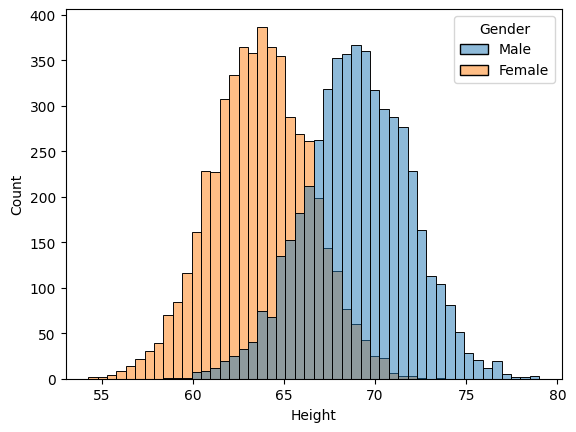

In [35]:
sns.histplot(data=df_hw, x="Height", hue="Gender")


In [37]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

print("Mean of men height:",height_men.mean() , "Mean of women height:",height_women.mean())
print("Variance of men height:",height_men.var() , "Variance of women height:",height_women.var())

Mean of men height: 69.02634590621741 Mean of women height: 63.70877360342507
Variance of men height: 8.19884325252049 Variance of women height: 7.269947493670132


Let's run levene test to test if Variances are equal

In [40]:
from scipy.stats import levene # Test variance


# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
print("Test Statistic", levene_stat)
print("P-Value", p_value)

if p_value < 0.05:
    print("Variances are not equal")


Test Statistic 12.284910854677701
P-Value 0.0004586349895436178
Variances are not equal
